Channels: 2, Frame Rate: 16000, Frames: 140800, Sample Width: 2


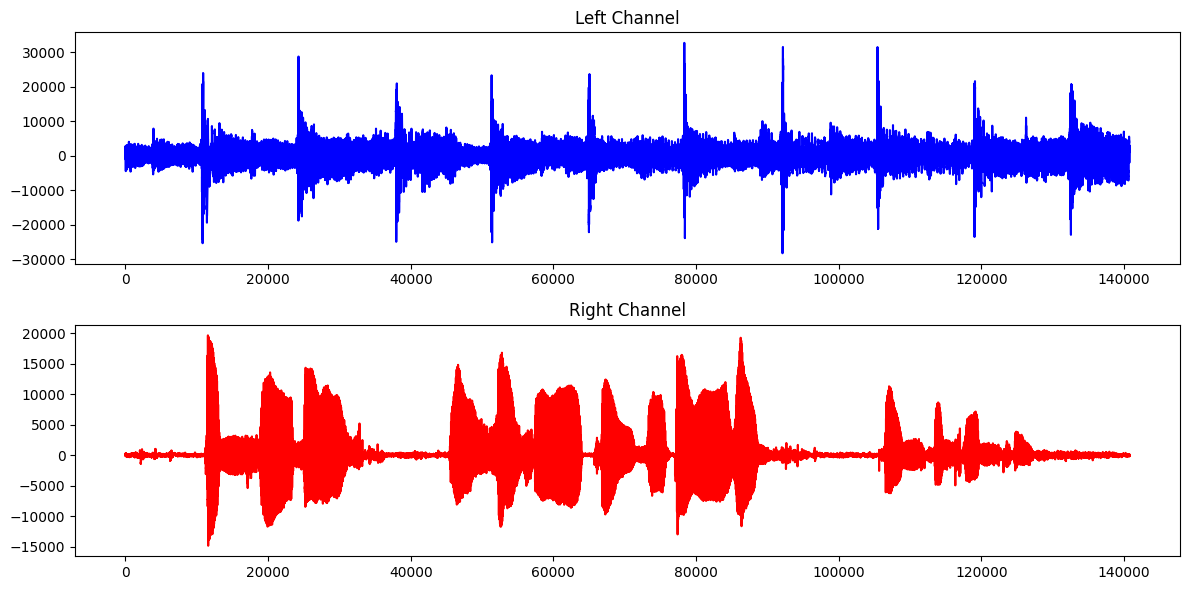

Separated channels saved as 'left_channel.wav' and 'right_channel.wav'


In [ ]:
import numpy as np
import wave
import matplotlib.pyplot as plt

# Load the WAV file
file_path = "./Data/Ani_1_01.wav"  # Replace with your WAV file path
wav = wave.open(file_path, 'rb')

# Extract audio parameters
n_channels = wav.getnchannels()
frame_rate = wav.getframerate()
n_frames = wav.getnframes()
sample_width = wav.getsampwidth()

print(f"Channels: {n_channels}, Frame Rate: {frame_rate}, Frames: {n_frames}, Sample Width: {sample_width}")

# Read audio data
audio_data = wav.readframes(n_frames)
wav.close()

# Convert audio data to numpy array
audio_array = np.frombuffer(audio_data, dtype=np.int16).reshape(-1, n_channels)

# Separate sources (left and right channels)
left_channel = audio_array[:, 0]
right_channel = audio_array[:, 1]

# Plot the channels
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(left_channel, color='blue')
plt.title("Left Channel")
plt.subplot(2, 1, 2)
plt.plot(right_channel, color='red')
plt.title("Right Channel")
plt.tight_layout()
plt.show()

# Save separated channels as new WAV files
def save_wav(file_name, data, frame_rate):
    with wave.open(file_name, 'wb') as wav_file:
        wav_file.setnchannels(1)  # Mono
        wav_file.setsampwidth(sample_width)
        wav_file.setframerate(frame_rate)
        wav_file.writeframes(data.tobytes())

save_wav("./Output/left_channel.wav", left_channel, frame_rate)
save_wav("./Output/right_channel.wav", right_channel, frame_rate)

print("Separated channels saved as 'left_channel.wav' and 'right_channel.wav'")